# Leer y graficar archivos de audio

## Requerimientos
#! pip install librosa
#! pip install pydub
PIL
! pip install ipynb
matplotlib
numpy
scipy
pandas

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15,10]
import librosa
import librosa.display
import IPython.display as ipd



from pydub import AudioSegment
from pydub.utils import mediainfo

(-0.05, 1.05, -1.3976396807297606, 1.1141733181299887)

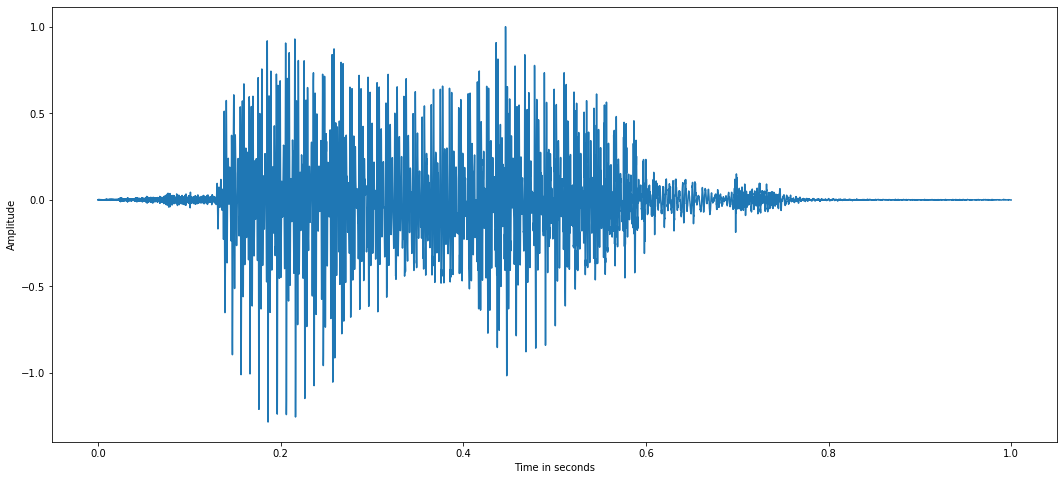

In [6]:
#speech_path ='data/bed/00176480_nohash_0.wav'
speech_path ='data/forward/0a2b400e_nohash_1.wav'
sound = AudioSegment.from_wav(speech_path)  # Read audio file
sound_samples = sound.get_array_of_samples()  # Extract signal samples
samp_freq = sound.frame_rate  # Sampling frequency

# Normalize to max amplitude of 1
speech_samples_norm = np.array(sound_samples)/np.max(np.array(sound_samples))

strt_samp = 0
end_samp = len(speech_samples_norm)
end_ms = len(speech_samples_norm)/samp_freq

xrange = np.linspace(0, end_ms, end_samp-strt_samp)

# Plot speech and the corresponding spectrogram
fg1 = plt.figure(figsize=(18, 8))
plt.plot(xrange, speech_samples_norm)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.axis('tight')

### Espectrograma

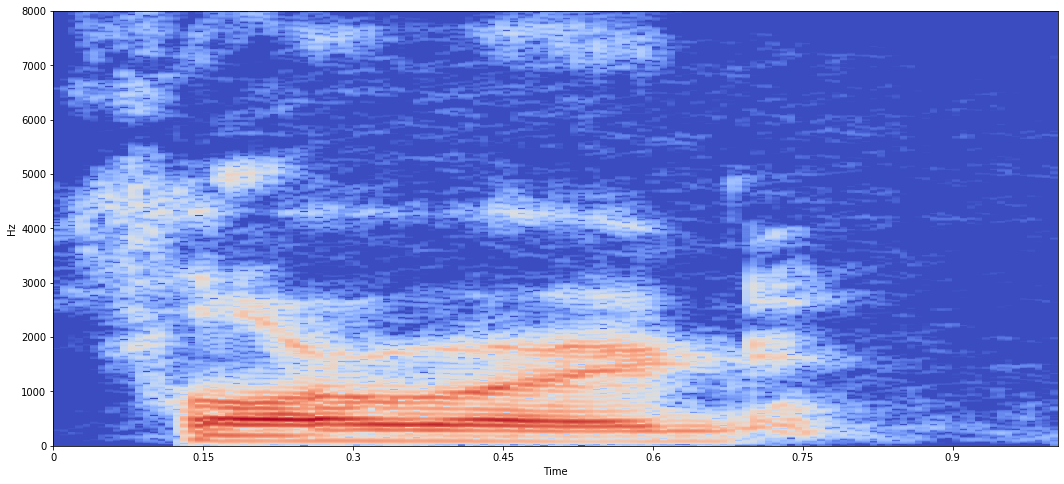

In [7]:
winlen = int(samp_freq*.03)  # Window size of 30 ms
X = librosa.stft(
    np.array(speech_samples_norm[strt_samp:end_samp]), win_length=winlen)
Xdb = librosa.amplitude_to_db(abs(X))
fg2 = plt.figure(figsize=(18, 8))
librosa.display.specshow(Xdb, sr=samp_freq, x_axis='time',
                         y_axis='hz', hop_length=winlen/4)